# Hands-on clustering exercise on Credit Card Data

## The goal of this excercise is to complete the hands-on experience task with similar task description as the project has.

**Dataset**

Dataset downloaded for download is here https://www.kaggle.com/arjunbhasin2013/ccdata

And also here: https://raw.githubusercontent.com/jplatos/Fundamentals-of-Machine-Learning/refs/heads/main/CCGENERAL.csv

**Context**

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

**Content**

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user


# Goal of the exercises


1. Load the data from as shown in the link bellow.
2. Made the explorative analysis on the data.
3. Evaluate the missing values, scale of the data.
4. Apply k-means or aglomerative clustering and chose the propriate number of clusters.
5. Describe the clusters and their difference.





In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jplatos/Fundamentals-of-Machine-Learning/refs/heads/main/CCGENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [11]:
#prázdné buňky
df.isna().sum().sort_values(ascending=False)

,0
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1
BALANCE,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0


In [35]:
df.dropna(inplace=True)

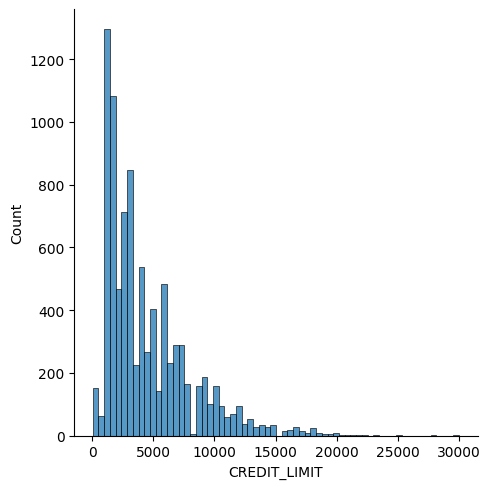

In [8]:
#sloupec CREDIT_LIMIT vypadá nejlépe, jde dobře vidět
sns.displot(df.CREDIT_LIMIT)
plt.show()

In [12]:
df.CREDIT_LIMIT.describe()

,CREDIT_LIMIT
count,8949.000000
mean,4494.449450
std,3638.815725
min,50.000000
25%,1600.000000
50%,3000.000000
75%,6500.000000
max,30000.000000


<Figure size 900x600 with 0 Axes>

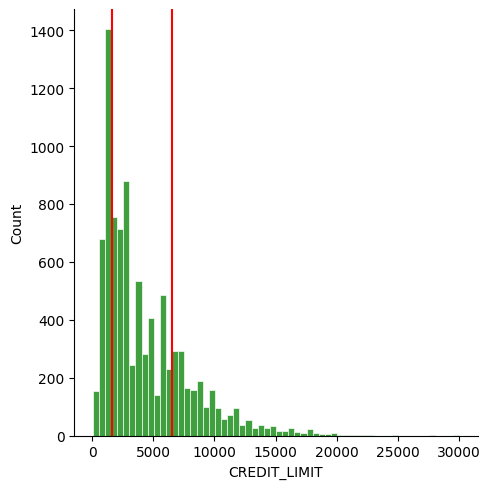

In [15]:
fig = plt.figure(figsize=(9,6))
sns.displot(df.CREDIT_LIMIT, bins=60, edgecolor='white', color='green')
plt.axvline(df.CREDIT_LIMIT.quantile(0.25), color='red')
plt.axvline(df.CREDIT_LIMIT.quantile(0.75), color='red')
plt.show()

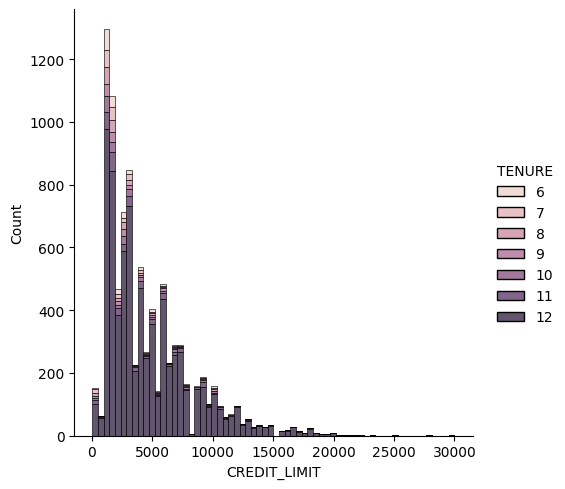

In [18]:
sns.displot(data=df, x='CREDIT_LIMIT', hue='TENURE', multiple='stack')
plt.show()

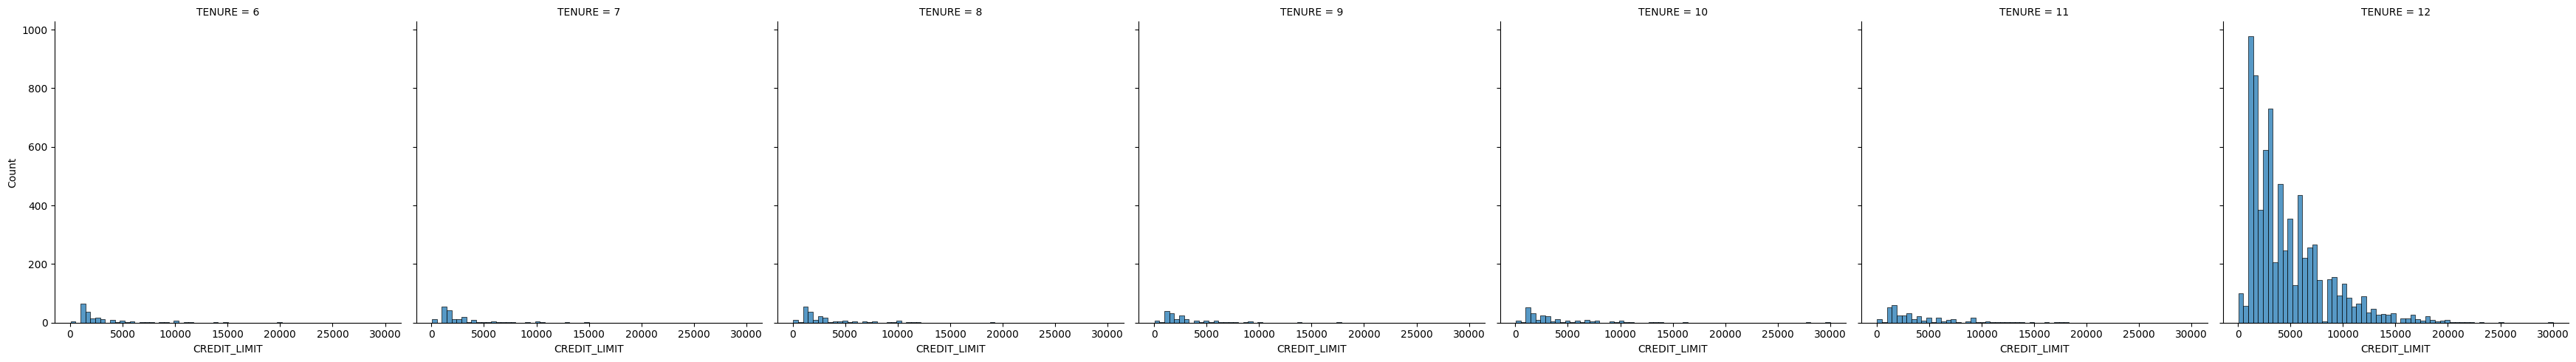

In [19]:
sns.displot(data=df, x='CREDIT_LIMIT', col='TENURE')
plt.show()

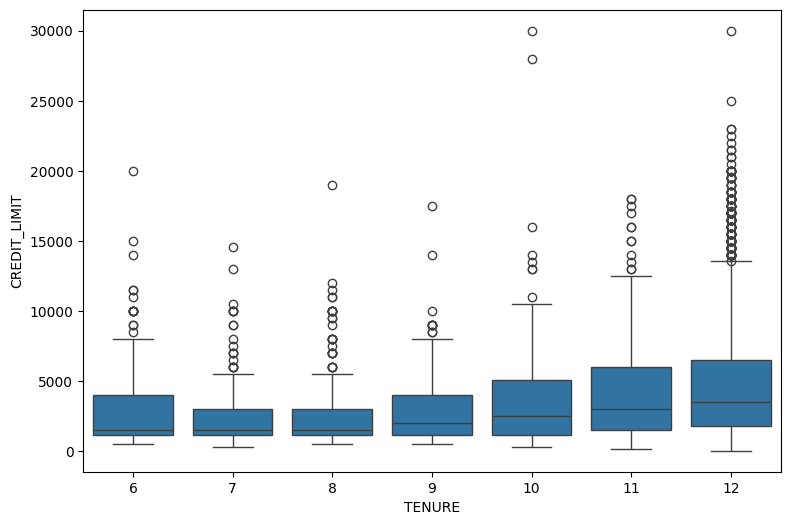

In [20]:
fig = plt.figure(figsize=(9,6))
sns.boxplot(data=df, x='TENURE', y='CREDIT_LIMIT')
plt.show()

In [52]:
df_clustering = df[['CREDIT_LIMIT', 'TENURE', 'BALANCE', 'PURCHASES', 'CASH_ADVANCE']].copy()


In [53]:
df_clustering.isna().sum()

,0
CREDIT_LIMIT,0
TENURE,0
BALANCE,0
PURCHASES,0
CASH_ADVANCE,0


In [54]:
#pro Elbow method
X = df_clustering.values
from sklearn.cluster import KMeans

In [55]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

In [56]:
df_clustering_scores

,sse,silhouette
k,,
2,1.383393e+11,0.525096
3,1.121036e+11,0.440342
4,9.416088e+10,0.434195
5,8.345703e+10,0.464046
6,7.151591e+10,0.437957
7,6.460289e+10,0.402035
8,6.179361e+10,0.330031
9,5.558420e+10,0.351684
10,5.208117e+10,0.320804


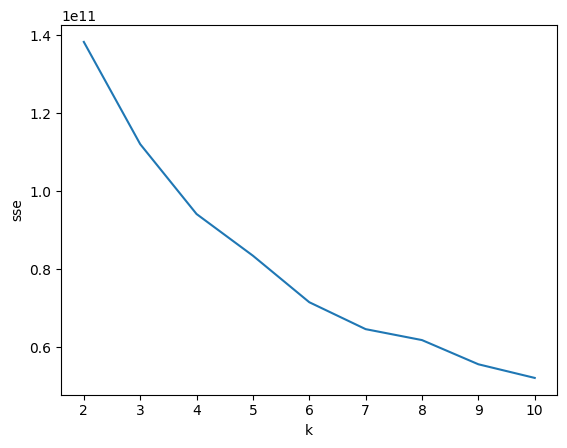

In [57]:
sns.lineplot(data = df_clustering_scores, x=df_clustering_scores.index, y='sse')
plt.show()

<Axes: xlabel='k', ylabel='silhouette'>

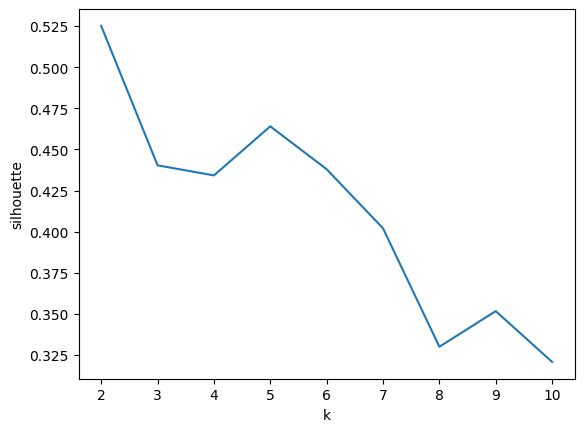

In [58]:
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

In [59]:
clustering = sklearn.cluster.KMeans(n_clusters=5, random_state=13)
clustering.fit(X)

KMeans(n_clusters=5, random_state=13)

In [60]:
pd.Series(clustering.labels_).value_counts()

,count
0,5383
2,1647
1,1107
3,465
4,34


In [61]:
df_clustering['cluster_id'] = clustering.labels_
df_clustering.head()

,CREDIT_LIMIT,TENURE,BALANCE,PURCHASES,CASH_ADVANCE,cluster_id
0,1000.0,12,40.900749,95.40,0.000000,0
1,7000.0,12,3202.467416,0.00,6442.945483,1
2,7500.0,12,2495.148862,773.17,0.000000,2
4,1200.0,12,817.714335,16.00,0.000000,0
5,1800.0,12,1809.828751,1333.28,0.000000,0


In [ ]:
for data_file

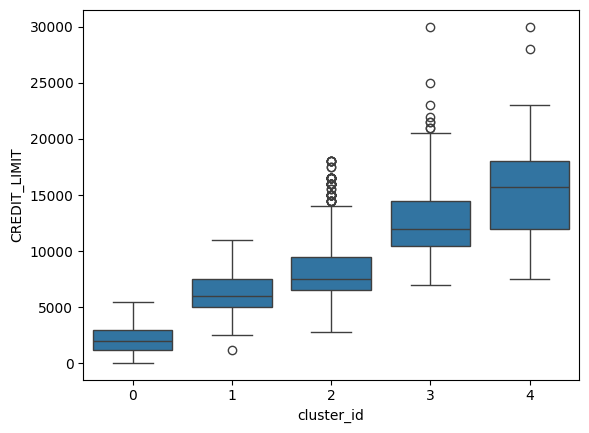

In [63]:
sns.boxplot(data=df_clustering, x='cluster_id', y='CREDIT_LIMIT')
plt.show()

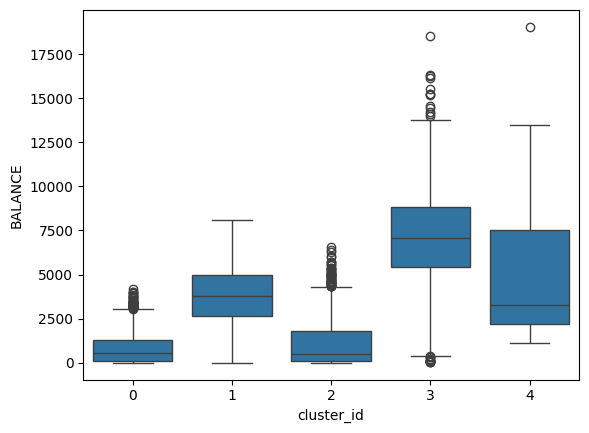

In [64]:
sns.boxplot(data=df_clustering, x='cluster_id', y='BALANCE')
plt.show()